In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import glob
import os

# Define the directory containing your CSV files
csv_directory = '/content/drive/MyDrive/Google Trends Data'  # Replace with your actual directory

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Create an empty list to store the dataframes
df_list = []

# Iterate through each CSV file
for file in csv_files:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file)
        df_list.append(df)
    except pd.errors.ParserError as e:
        print(f"Error reading file {file}: {e}")
    except FileNotFoundError as e:
        print(f"Error: File not found {file}: {e}")

# Concatenate all the dataframes into a single dataframe
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)

    # Save the combined dataframe to a new CSV file
    output_file = '//content/drive/MyDrive/Google Trends Data/combined__queries_file.csv' # Replace with desired output path
    combined_df.to_csv(output_file, index=False)

    print(f"Combined CSV file saved to: {output_file}")
else:
    print("No CSV files found or all files had errors.")

Combined CSV file saved to: //content/drive/MyDrive/Google Trends Data/combined__queries_file.csv


In [31]:
df = pd.read_csv('//content/drive/MyDrive/Google Trends Data/combined__queries_file.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOP         80 non-null     object 
 1   VALUE       41 non-null     float64
 2   RISING      80 non-null     object 
 3   VALUE.1     41 non-null     object 
 4   Unnamed: 1  39 non-null     float64
 5   Unnamed: 3  39 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.9+ KB
None


In [55]:
df.head()

,TOP,VALUE,RISING,VALUE.1
0,furniture,100.0,furlenco furniture s,Breakout
1,furniture shop,10.0,wakefit furniture,4750%
2,furniture near me,8.0,wakefit,4550%
3,furniture design,7.0,furnishka furniture,3850%
4,furniture online,5.0,kakoli furniture,3750%


Here we've successfully combines relatedqueries data from google trends and created a combined_queries.csv file.

In [33]:
# checking for missing values
print(df.isnull().sum())

TOP            0
VALUE         39
RISING         0
VALUE.1       39
Unnamed: 1    41
Unnamed: 3    41
dtype: int64


In [37]:
#merging the data misplaced in the unnamed columns back into the VALUE columns
df.loc[df['VALUE'].isnull() & df['Unnamed: 1'].notnull(), 'VALUE'] = df['Unnamed: 1']
df.loc[df['VALUE.1'].isnull() & df['Unnamed: 3'].notnull(), 'VALUE.1'] = df['Unnamed: 3']

df = df.drop(columns=['Unnamed: 1', 'Unnamed: 3'])#dropping the unnecessary columns

df.to_csv('//content/drive/MyDrive/Google Trends Data/combined__queries_new_file.csv', index=False)

print("Misplaced data has been fixed!")


Misplaced data has been fixed!


#  Trend Analysis

 1. High-Growth Keywords
  
  Filtering rows from VALUE.1(RISING values) and sorting them by growth

In [41]:
df = pd.read_csv("//content/drive/MyDrive/Google Trends Data/combined__queries_new_file.csv")
high_growth_keywords = df[df['VALUE.1'].str.contains("Breakout|%", na=False)]

def parse_percentage(val):
    if isinstance(val, str) and '%' in val:
        return float(val.replace('%', ''))
    elif val == "Breakout":
        return float('inf')  #breakout = infinite growth
    return 0

df['Growth'] = df['VALUE.1'].apply(parse_percentage)

high_growth_keywords = df.sort_values(by='Growth', ascending=False)
print("High-Growth Keywords:\n", high_growth_keywords[['TOP', 'RISING', 'Growth']])

high_growth_keywords.to_csv("//content/drive/MyDrive/Google Trends Data/0_high_growth_keywords.csv", index=False)


High-Growth Keywords:
                            TOP                    RISING  Growth
0                    furniture      furlenco furniture s     inf
62  black and white home decor     ikea home decor ideas     inf
52             ikea home decor          black home decor     inf
53            white home decor          home decor ideas     inf
27                       house               interior ai     inf
..                         ...                       ...     ...
75     online home furnishings                    darpan    90.0
76       ikea home furnishings   luxury home furnishings    80.0
77                        ikea    home furnishings store    60.0
78                      darpan       at home furnishings    60.0
79          darpan furnishings  home furnishings company    50.0

[80 rows x 3 columns]


<ipython-input-52-afb3538c94f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Growth', y=category_comparison.index, data=category_comparison, palette='coolwarm')
<ipython-input-52-afb3538c94f7>:9: UserWarning: Glyph 2347 (\N{DEVANAGARI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-afb3538c94f7>:9: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-52-afb3538c94f7>:9: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-afb3538c94f7>:9: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-52-afb3538c94f7>:9: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.t

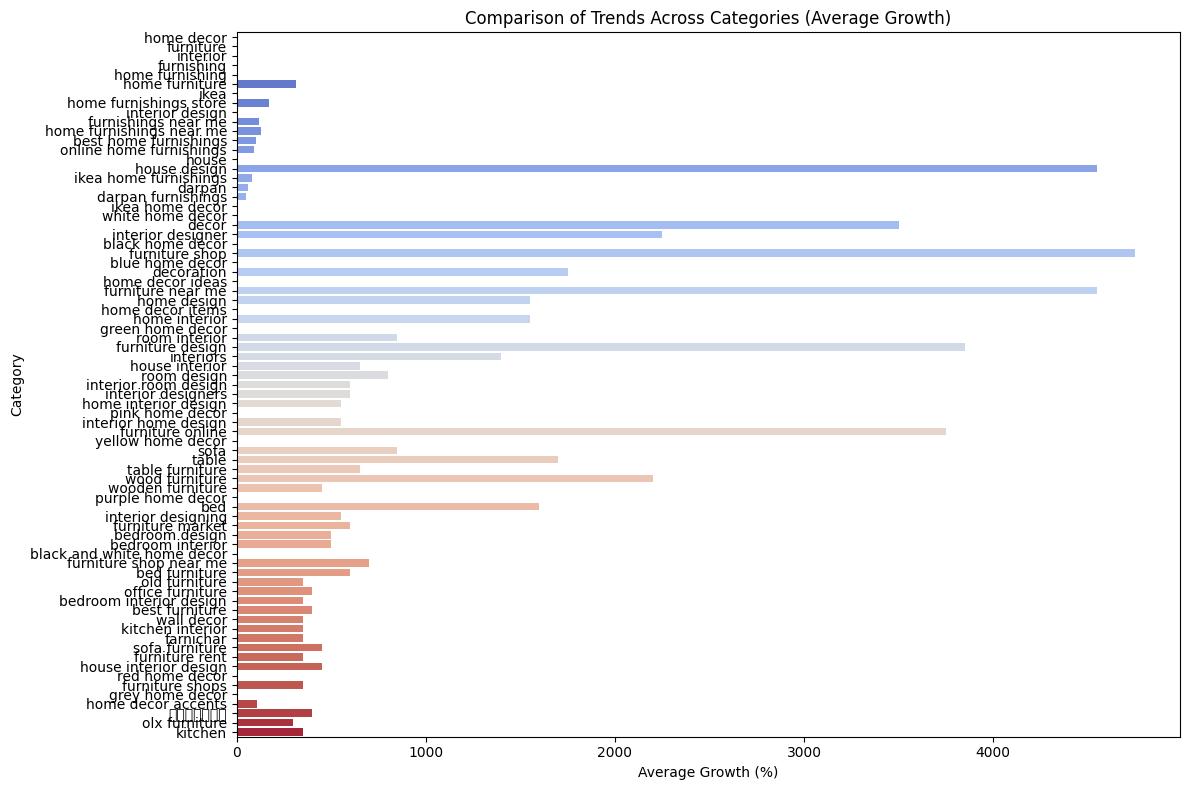

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting a graph to visualize the same.
plt.figure(figsize=(12, 8))
sns.barplot(x='Growth', y=category_comparison.index, data=category_comparison, palette='coolwarm')
plt.title("Comparison of Trends Across Categories (Average Growth)")
plt.xlabel("Average Growth (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

2. Comparing Trends Across Categories

  Grouping data by keyword type

In [42]:
category_comparison = df.groupby('TOP').agg({
    'VALUE': 'sum',  #search volume
    'Growth': 'mean' # average growth
}).sort_values(by='VALUE', ascending=False)

print("\nComparison of Trends Across Categories:\n", category_comparison)
category_comparison.to_csv("//content/drive/MyDrive/Google Trends Data/0_category_comparison.csv")


Comparison of Trends Across Categories:
                     VALUE  Growth
TOP                              
home decor          209.0     inf
furniture           158.0     inf
interior            100.0     inf
furnishing           77.0     inf
home furnishing      76.0     inf
...                   ...     ...
grey home decor       3.0     inf
home decor accents    3.0   110.0
फर्नीचर               3.0   400.0
olx furniture         2.0   300.0
kitchen               2.0   350.0

[75 rows x 2 columns]


<ipython-input-51-a5cd1473c926>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VALUE', y=category_comparison.index, data=category_comparison, palette='magma')
<ipython-input-51-a5cd1473c926>:9: UserWarning: Glyph 2347 (\N{DEVANAGARI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-a5cd1473c926>:9: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-51-a5cd1473c926>:9: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-a5cd1473c926>:9: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-51-a5cd1473c926>:9: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight

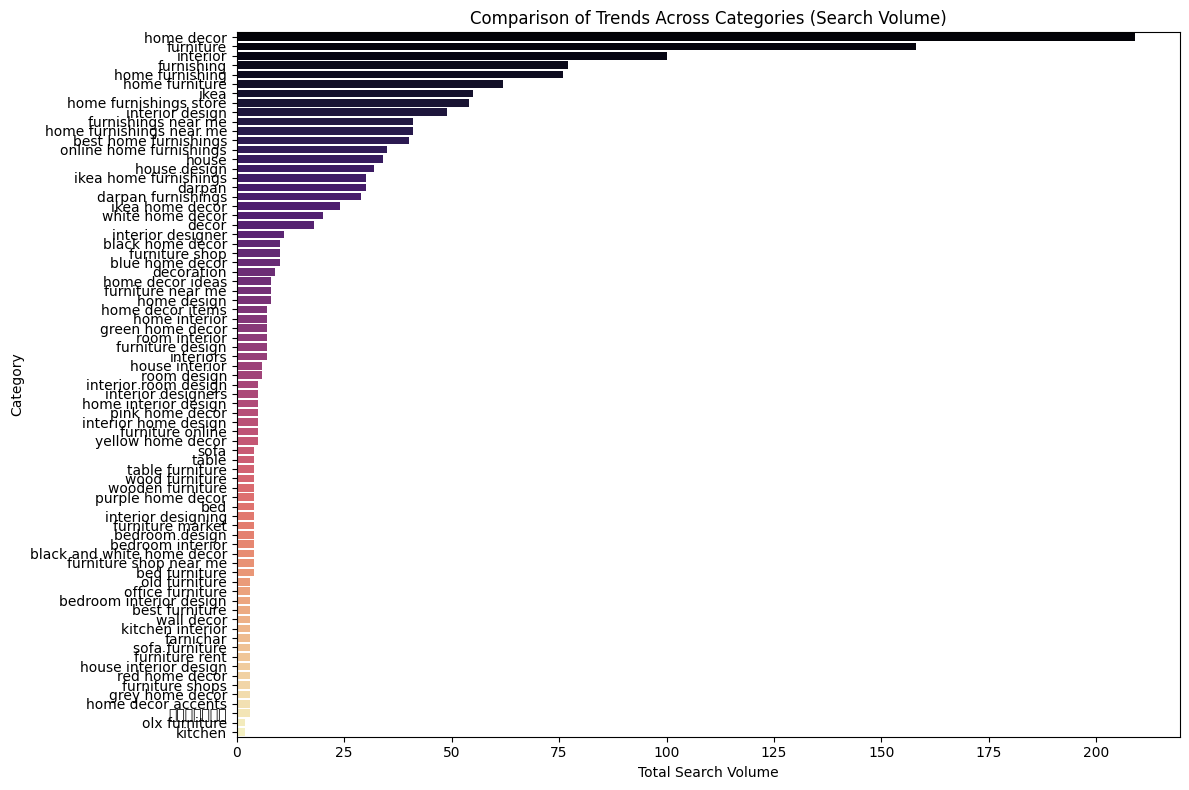

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='VALUE', y=category_comparison.index, data=category_comparison, palette='magma')
plt.title("Comparison of Trends Across Categories (Search Volume)")
plt.xlabel("Total Search Volume")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

3. Seasonal Analysis

 Looking for seasonal keywords(such as diwali, christmas) to identify seasonal patterns

In [43]:
seasonal_keywords = df[df['TOP'].str.contains("Diwali|Christmas|New Year|Eid", case=False, na=False) |
                        df['RISING'].str.contains("Diwali|Christmas|New Year|Eid", case=False, na=False)]

print("\nSeasonal Keywords:\n", seasonal_keywords[['TOP', 'RISING', 'VALUE', 'VALUE.1']])
seasonal_keywords.to_csv("//content/drive/MyDrive/Google Trends Data/0_seasonal_keywords.csv")


Seasonal Keywords:
           TOP                   RISING  VALUE VALUE.1
35  interiors  diwali decoration ideas    7.0   1400%


Brand Mentions: Identify and count mentions in TOP and RISING

In [56]:
df = pd.read_csv("//content/drive/MyDrive/Google Trends Data/Copy of combined__queries_new_file.csv")

brands = ['IKEA', 'furlenco', 'OLX', 'Amazon', 'Urban Ladder', 'Pepperfry', 'Darpan', 'wakefit', 'furnishka'] #list of known brands to track

def track_mentions(column, brands):
    mentions = {}
    for brand in brands:
        mentions[brand] = df[column].str.contains(brand, case=False, na=False).sum()
    return pd.DataFrame(mentions.items(), columns=['Brand', f'{column}_Mentions'])

top_mentions = track_mentions('TOP', brands)
rising_mentions = track_mentions('RISING', brands)

brand_mentions = pd.merge(top_mentions, rising_mentions, on='Brand', how='outer').fillna(0) #combine top and rising

brand_mentions.to_csv("brand_mentions.csv", index=False)
print("\nBrand Mentions Across Queries:\n", brand_mentions)



Brand Mentions Across Queries:
           Brand  TOP_Mentions  RISING_Mentions
0        Amazon             0                0
1        Darpan             2                2
2          IKEA             4                3
3           OLX             1                0
4     Pepperfry             0                0
5  Urban Ladder             0                0
6      furlenco             0                1
7     furnishka             0                1
8       wakefit             0                2


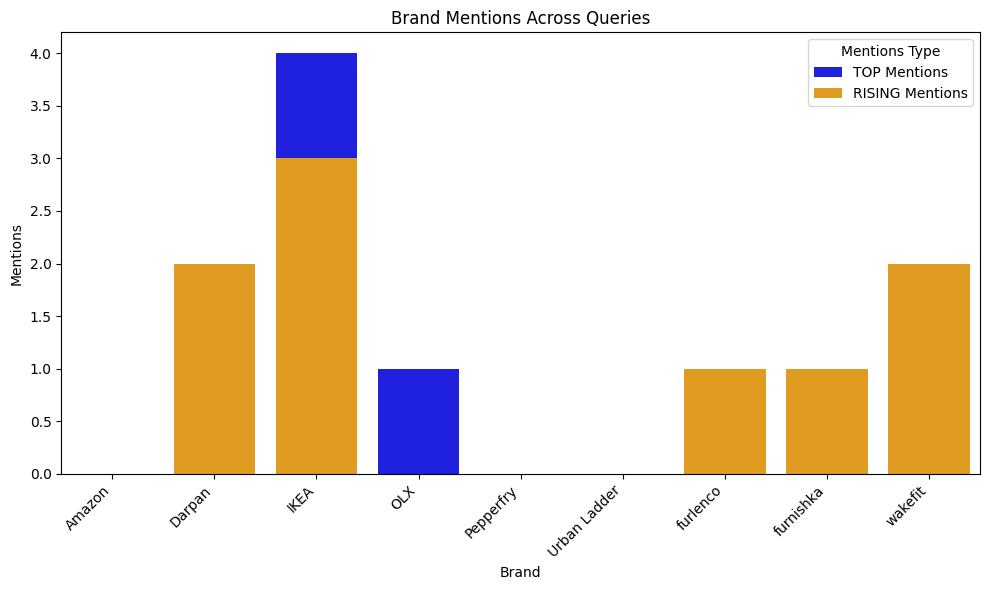

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brand_mentions_df = pd.read_csv("brand_mentions.csv")
rising_competitors_df = pd.read_csv("rising_competitors.csv")

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='TOP_Mentions', data=brand_mentions_df, color='blue', label='TOP Mentions')
sns.barplot(x='Brand', y='RISING_Mentions', data=brand_mentions_df, color='orange', label='RISING Mentions')

plt.title("Brand Mentions Across Queries")
plt.xlabel("Brand")
plt.ylabel("Mentions")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Mentions Type")
plt.tight_layout()
plt.show()